In [1]:
env_USE_GOOGLE_COLAB = False
env_USE_NVIDIA = False
env_CONTENT_PATH = ""
env_TIF_PATH = ""
import sys
from settings import load_BatGutsSettings, show_python_version, corr2
show_python_version()

S = load_BatGutsSettings()
env_CONTENT_PATH = S.zContentPath
env_TIF_PATH = S.zTifPath
env_USE_GOOGLE_COLAB = S.useGoogleColab
env_USE_NVIDIA = S.useNvidia
if len(env_CONTENT_PATH) == 0:
    sys.exit("Exiting the script because setings were not processed")

Python version: 3.12.4
Loading settings from /Users/thomasyohe/isr/BatGutsImageClassification2/jupyternb/.env
my_CONTENT_PATH=/Users/thomasyohe/isr/bguts
my_TIF_PATH=/Users/thomasyohe/isr/bguts/tiffs


In [2]:
if env_USE_GOOGLE_COLAB:
    from google.colab import drive
    drive.mount('/content/drive/')

In [3]:
if env_USE_NVIDIA:
    !nvidia-smi
    

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff
import numpy as np
from PIL import Image
from PIL import  ImageOps
import os
import glob
# Data Preprocessing for Bat images


In [5]:
full_path =  env_CONTENT_PATH + '/images/Bats_mixed_images_RGB_256/Plants/*.jpeg'
plants_paths=glob.glob( full_path)
print( "There are " + str(len(plants_paths)) + " plant images in " + full_path )

There are 30 plant images in /Users/thomasyohe/isr/bguts/images/Bats_mixed_images_RGB_256/Plants/*.jpeg


In [6]:
full_path = env_CONTENT_PATH + '/images/Bats_mixed_images_RGB_256/Insects/*.jpeg'
insects_paths=glob.glob(full_path)
print( "There are " + str(len(insects_paths)) + " insect images in " + full_path )

There are 16 insect images in /Users/thomasyohe/isr/bguts/images/Bats_mixed_images_RGB_256/Insects/*.jpeg


In [7]:
insects_paths[0]

'/Users/thomasyohe/isr/bguts/images/Bats_mixed_images_RGB_256/Insects/LS042_Cormura_brevirostris-LY20_10-insect-guts-LY20-10A-AB-08-Plane000__red.jpeg'

In [8]:
im = Image.open(plants_paths[0])

im.show()

In [9]:
import time

In [10]:
def display_jpeg_image(path):
  im = Image.open(path)

  im.show()

In [11]:
def display_tiff_image(path):
  baseimage = tiff.imread(path)
  print ('original image shape',baseimage.shape)
  baseimage = np.squeeze(baseimage)

  plt.figure()

  plt.imshow(baseimage)

In [12]:
insects_paths[0]

'/Users/thomasyohe/isr/bguts/images/Bats_mixed_images_RGB_256/Insects/LS042_Cormura_brevirostris-LY20_10-insect-guts-LY20-10A-AB-08-Plane000__red.jpeg'

In [13]:
display_jpeg_image(insects_paths[1])

In [14]:
def Save_images_in_r_g_b(category):
  print(category)
  full_prefix = env_TIF_PATH + "Bat_Guts/"
  for main_path in glob.glob( full_prefix+ str(category)+"/"):
    paths=glob.glob(os.path.join(main_path,"*.tif"))
    for image_path in paths:
      print(paths.index(image_path))
      large_image = tiff.imread(image_path)

      newpath =  env_CONTENT_PATH + 'Bats_mixed_images_RGB_256/'+category+'/'+ str(image_path[40:-4])

      r, g, b = np.moveaxis(large_image, -1, 0)
      tiff.imwrite(newpath+"__"+"red"+".jpeg",r)
      tiff.imwrite(newpath+"__"+"green"+".jpeg",g)
      tiff.imwrite(newpath+"__"+"blue"+".jpeg",b)


      print("Completed for "+" "+str(image_path[40:-4]) )
      time.sleep(0.2)

    print("Completed")

In [15]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

In [16]:
full_path = env_CONTENT_PATH + '/images/Bats_mixed_images_RGB_512/Blood/20-12A-001__blue.jpeg'
image = Image.open( full_path )

In [17]:
resized_img = image.resize((256,256))


In [18]:
full_path = env_CONTENT_PATH + "/images/Bats_mixed_images_RGB_256/Insects/2021-11-16 14-32-46 (B,Radius8,Smoothing4)__green.jpeg"
resized_img.save(full_path)

In [19]:
#uncomment below code for data patches

In [20]:
Save_images_in_r_g_b('Blood')
Save_images_in_r_g_b('Plants')
Save_images_in_r_g_b('Insects')

Blood
Plants
Insects


In [21]:
def resizing_image(category):
  try:
    print(category)
    full_prefix = env_CONTENT_PATH + "/images/Bats_mixed_images_RGB_256/"
    for main_path in glob.glob( full_prefix + str(category)+"/"):
      paths=glob.glob(os.path.join(main_path,"*.jpeg"))
      for image_path in paths:
        print(paths.index(image_path))
        try:
          image = cv2.imread(image_path)
        except Exception  as e:
          print(image_path)
          print(e)
          continue
        resized_image = cv2.resize(image,(256,256))
        cv2.imwrite(image_path, resized_image)
    print('completed')
  except Exception  as e:
    print(e)







In [22]:
import os
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = str(pow(2,40))
import cv2

In [23]:
resizing_image('Blood')
resizing_image('Plants')
resizing_image('Insects')

Blood
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
completed
Plants
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
completed
Insects
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
completed


In [24]:
#data Training
#This code block requires: pip install tensorflow --upgrade
#and this: pip install scikit-learn --upgrade
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [25]:
if env_USE_NVIDIA:
    physical_devices = tf.config.experimental.list_physical_devices('GPU')
    print("Num GPUs Available: ", len(physical_devices))
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [26]:
datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2],# brightness
        fill_mode='nearest')

In [27]:
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [28]:
train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=env_CONTENT_PATH+'/images/Bats_mixed_images_RGB_256',
                                                 shuffle=True,
                                                 target_size=(256, 256),
                                                 subset="training",
                                                 class_mode='categorical')

validation_dataset = val_datagen.flow_from_directory(batch_size=32,
                                                 directory=env_CONTENT_PATH+'/images/Bats_mixed_images_RGB_256',
                                                 shuffle=True,
                                                 target_size=(256,256),
                                                 subset="validation",
                                                 class_mode='categorical')

Found 76 images belonging to 3 classes.
Found 7 images belonging to 3 classes.


In [29]:
train_dataset

In [30]:
train_dataset.class_indices

{'Blood': 0, 'Insects': 1, 'Plants': 2}

In [31]:
imgs, labels = next(train_dataset)

In [32]:
len(imgs)

32

In [33]:
len(labels)

32

In [34]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

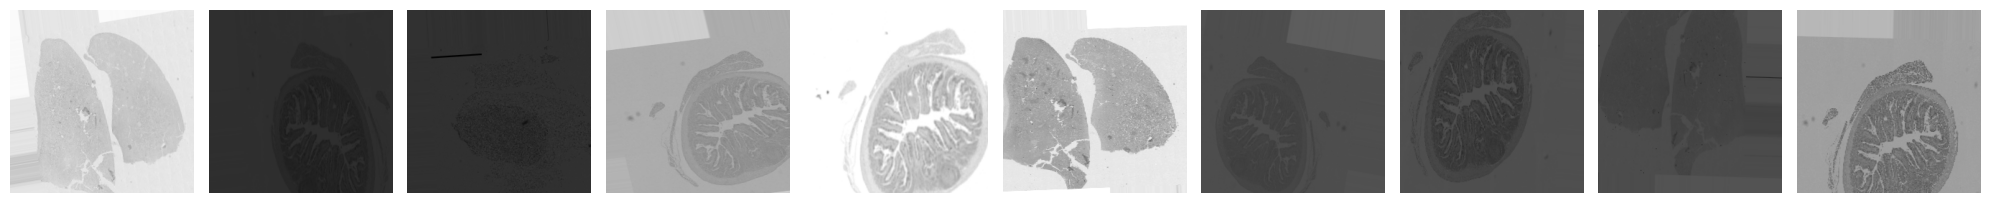

In [35]:
plotImages(imgs)


In [36]:
# #SAMPLE ARCHITECTURE
# model = Sequential()
# model.add(Conv2D(input_shape=(512,512,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
# model.add(Conv2D(128,kernel_size=(3,3),activation='relu',input_shape=(512,512,3) ))
# model.add(Conv2D(64,(3,3),activation='relu' ))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(64,(3,3),activation='relu' ))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Conv2D(128,(3,3),activation='relu' ))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))

# model.add(Flatten())
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(3,activation='softmax'))
# model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])



In [37]:
#VGG16 ARCHITECTURE

In [38]:
model = Sequential()
model.add(Conv2D(input_shape=(256,256,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=3, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/envs/BatGuts4/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,099 (64.13 MB)

 Trainable params: 16,812,099 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
import tensorflow as tf
tf.test.gpu_device_name()

''

In [41]:
if env_USE_NVIDIA:
    !nvidia-smi

In [42]:
import math

In [43]:
hist = model.fit(train_dataset, 
                 steps_per_epoch= math.ceil(train_dataset.samples//32),
                 epochs=25,
                 validation_data=validation_dataset,
                 validation_steps=2,
                 verbose=True)

Epoch 1/25


/opt/anaconda3/envs/BatGuts4/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 12s 8s/step - accuracy: 0.2955 - loss: 1.3778 - val_accuracy: 0.4286 - val_loss: 1.0977
Epoch 2/25


/opt/anaconda3/envs/BatGuts4/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 511ms/step - accuracy: 0.3438 - loss: 1.0990 - val_accuracy: 0.4286 - val_loss: 1.0937
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 8s/step - accuracy: 0.2677 - loss: 1.0951 - val_accuracy: 0.4286 - val_loss: 1.0252
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 479ms/step - accuracy: 0.2812 - loss: 1.0952 - val_accuracy: 0.4286 - val_loss: 1.0435
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 8s/step - accuracy: 0.4271 - loss: 1.1054 - val_accuracy: 0.4286 - val_loss: 1.0736
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 492ms/step - accuracy: 0.1667 - loss: 1.1400 - val_accuracy: 0.4286 - val_loss: 1.0704
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3523 - loss: 1.0888 - val_accuracy: 0.4286 - val_loss: 1.0663
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 523ms/step - accuracy: 0.4688 - loss: 1.0726 - val_accuracy: 0.4286 - val_loss: 1.0582
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 15s 7s/step - accuracy: 0.3542 - loss: 1.0854 - val_accuracy: 0.4286 - val_loss: 1.0392
Epoch 10/25

In [44]:
from keras.applications.xception import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image

In [45]:
def classify(img_path,model):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    print(img_array)
    img_batch = np.expand_dims(img_array, axis=0)

    img_preprocessed = preprocess_input(img_batch)

    prediction = model.predict(img_preprocessed)

    return prediction

In [46]:
zBase = env_CONTENT_PATH+"/images/Bats_mixed_images_RGB_256/Insects"
zFilePath = zBase + "/LS042_Cormura_brevirostris-LY20_10-insect-guts-LY20-10A-AB-08-LY20-10A_ab_08_LS042_Cobr_2021-09-21 15-27-21 (B,Radius8,Smoothing4)__blue.jpeg"
prediction=classify( zFilePath,model)
prediction

[[[220. 220. 220.]
  [204. 204. 204.]
  [221. 221. 221.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[222. 222. 222.]
  [218. 218. 218.]
  [219. 219. 219.]
  ...
  [253. 253. 253.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[219. 219. 219.]
  [217. 217. 217.]
  [221. 221. 221.]
  ...
  [255. 255. 255.]
  [253. 253. 253.]
  [254. 254. 254.]]

 ...

 [[255. 255. 255.]
  [254. 254. 254.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [253. 253. 253.]
  [254. 254. 254.]]

 [[251. 251. 251.]
  [251. 251. 251.]
  [255. 255. 255.]
  ...
  [254. 254. 254.]
  [254. 254. 254.]
  [252. 252. 252.]]

 [[255. 255. 255.]
  [252. 252. 252.]
  [254. 254. 254.]
  ...
  [254. 254. 254.]
  [255. 255. 255.]
  [254. 254. 254.]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


array([[0.38451672, 0.23686402, 0.3786193 ]], dtype=float32)

In [47]:
zBase = env_CONTENT_PATH + "/images/Bats_mixed_images_RGB_256/Insects"
zFilePath = zBase + "/LS042_Cormura_brevirostris-LY20_10-insect-guts-LY20-10A-AB-08-LY20-10A_ab_08_LS042_Cobr_2021-09-21 15-27-21 (B,Radius8,Smoothing4)__green.jpeg"
prediction=classify( zFilePath,model)
prediction

[[[211. 211. 211.]
  [203. 203. 203.]
  [205. 205. 205.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [254. 254. 254.]]

 [[205. 205. 205.]
  [204. 204. 204.]
  [210. 210. 210.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[205. 205. 205.]
  [207. 207. 207.]
  [209. 209. 209.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [254. 254. 254.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [252. 252. 252.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [255. 255. 255.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [254. 254. 254.]
  [252. 252. 252.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [253. 253. 253.]
  ...
  [251. 251. 251.]
  [255. 255. 255.]
  [254. 254. 254.]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step


array([[0.38451672, 0.23686403, 0.3786193 ]], dtype=float32)

In [48]:
zFileName=env_TIF_PATH+'/LS022_Desmodus_rotundus_LY20-12-blood/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12B-AB-03/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12B-AB-03-LY20-12B_ab_03_LS022_Dero_2021-09-20 18-16-53 (C,Smoothing4).tif'
image_1 = tiff.imread(zFileName)


In [49]:
zFileName=env_TIF_PATH+'/LS022_Desmodus_rotundus_LY20-12-blood/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12B-AB-03/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12B-AB-03-LY20-12B_ab_03_LS022_Dero_2021-09-20 18-16-53 (C,Smoothing4).tif'
image_2 =  tiff.imread(zFileName)


In [50]:
import numpy as np
correlation = np.corrcoef(image_1.flatten(), image_2.flatten())

In [51]:
corr2(image_1,image_2)

1.0

In [52]:
'''
Now we will launch the mlflow user interface which allows you to conduct machine learning experiments
Click on any key at the top of the screen to terminate the mlflow web server
'''
from settings import kill_mlflow_server
kill_mlflow_server()
from settings import run_mlflow_until_q
path = env_CONTENT_PATH + "/sample_data"
run_mlflow_until_q(path)

MLflow server processes on port 5000 have been terminated.
MLflow UI started. Access it at http://127.0.0.1:5000
Enter 'q' up at the top of the screen to terminate
MLflow UI has been shut down.


In [53]:

import os
path = env_CONTENT_PATH + "/sample_data"
os.makedirs(path, exist_ok=True)
os.chdir(path)
zCwd=os.getcwd()
print("The current working directory is now:", zCwd)


The current working directory is now: /Users/thomasyohe/isr/bguts/sample_data


In [54]:
''' 
Key points about this code:
It's setting up an environment for a machine learning task, likely involving image 
processing or natural language processing (depending on the specific model loaded).
The use of TensorFlow and TensorFlow Hub suggests this is part of a deep learning project.
The inclusion of Pandas and Matplotlib indicates that there will likely be data manipulation 
and visualization in the project.
The PIL and io imports suggest that image processing might be involved.
The code doesn't perform any specific task yet; it's mainly importing necessary 
libraries and setting up a pre-trained model for later use.
The actual functionality of the embed layer will depend on the specific model 
loaded from the current working directory.
This code appears to be the initial setup for a larger machine learning project, 
possibly involving image or text analysis using a pre-trained model from TensorFlow Hub.
'''
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import base64
from PIL import Image
import io
import math
from math import sqrt


%matplotlib inline

# Specify the URL of the pre-trained model
import tensorflow as tf

# Load a model that expects image tensor inputs
model_url = "https://tfhub.dev/google/imagenet/mobilenet_v2_100_224/feature_vector/4"
embed = hub.KerasLayer(model_url)

def process(self):
    img = tf.io.read_file(self.filename)
    img = tf.image.decode_jpeg(img, channels=3)
    img = tf.image.resize_with_pad(img, 224, 224)
    img = tf.image.convert_image_dtype(img, tf.float32)[tf.newaxis, ...]
    features = embed(img)
    feature_set = np.squeeze(features)
    return list(feature_set)



In [55]:
class TensorVector(object):

    def __init__(self, FileName=None):
        self.FileName = FileName

    def process(self):

        img = tf.io.read_file(self.FileName)
        img = tf.io.decode_jpeg(img, channels=3)
        img = tf.image.resize_with_pad(img, 224, 224)
        img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]
        features = embed(img)
        feature_set = np.squeeze(features)
        return list(feature_set)

In [56]:
zDir = env_CONTENT_PATH+"/images/Bats_mixed_images_RGB_256/Blood"
zFile = zDir + "/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane004__blue.jpeg"
helper = TensorVector( zFile )
vector = helper.process()